In [1]:
from resources.workspace import *
%matplotlib inline

## Dynamical systems
are systems (sets of equations) whose variables evolve in time (the equations contains time derivatives). As a branch of mathematics, its theory is mainly concerned with understanding the behaviour of solutions (trajectories) of the systems.

## Chaos
is also known as the butterfly effect: "a buttefly that flaps its wings in Brazil can 'cause' a hurricane in Texas".

As opposed to the opinions of Descartes/Newton/Laplace, chaos effectively means that even in a deterministic (non-stochastic) universe, we can only predict "so far" into the future. This will be illustrated below using two toy-model dynamical systems made by Edward Lorenz.

---
## The Lorenz (1963) attractor

The [Lorenz-63 dynamical system](resources/DA_intro.pdf#page=22) can be derived as an extreme simplification of *Rayleigh-Bénard convection*: fluid circulation in a shallow layer of fluid uniformly heated (cooled) from below (above).
This produces the following 3 *coupled* ordinary differential equations (ODE):

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

where the "dot" represents the time derivative, $\frac{d}{dt}$. The state vector is $\mathbf{x} = (x,y,z)$, and the parameters are typically set to

In [2]:
SIGMA = 10.0
BETA  = 8/3
RHO   = 28.0

The ODEs can be coded as follows

In [3]:
def dxdt(xyz, t0, sigma, beta, rho):
    """Compute the time-derivative of the Lorenz-63 system."""
    x, y, z = xyz
    return [
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ]

#### Numerical integration to compute the trajectories

Below is a function to numerically **integrate** the ODEs and **plot** the solutions.

<!--
This function also takes arguments to control ($\sigma$, $\beta$, $\rho$) and of the numerical integration (`N`, `T`).
-->

Widget Javascript not detected.  It may not be installed or enabled properly.


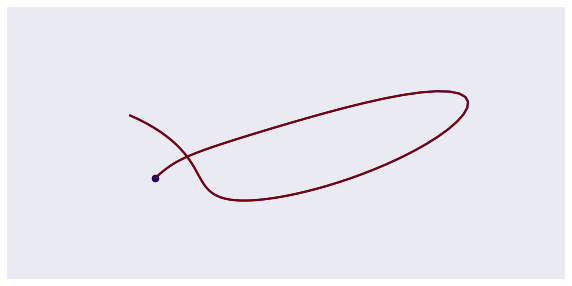

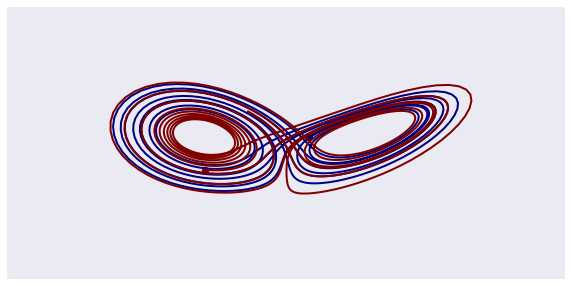

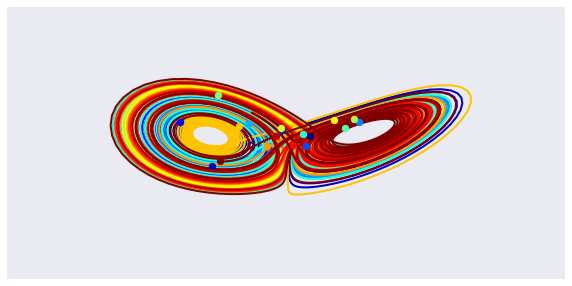

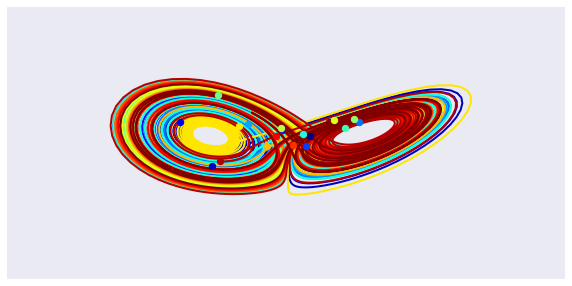

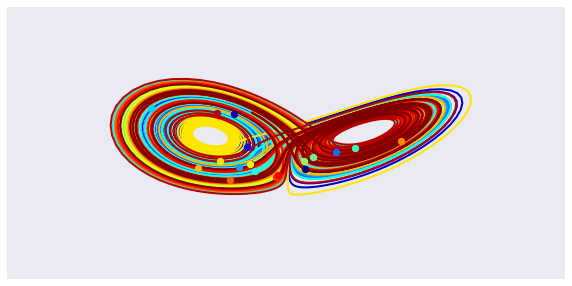

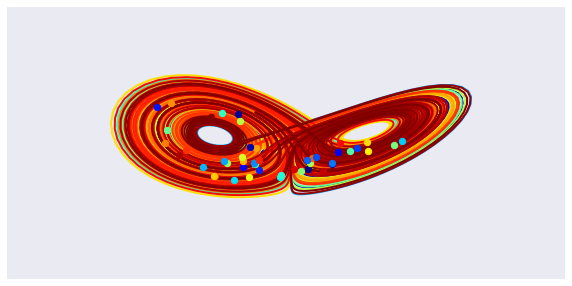

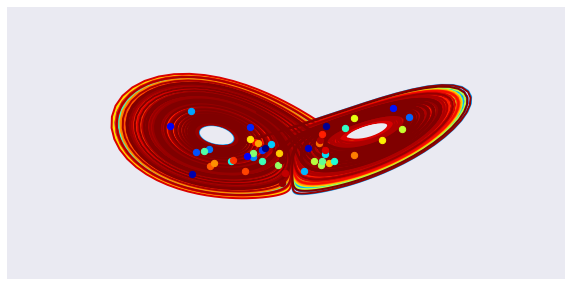

In [7]:
from scipy.integrate import odeint # integrator

output_63 = [None]

@interact(         sigma=(0.,50), beta=(0.,5), rho=(0.,50), N=(0,50), eps=(0.01,1), T=(0.,30))
def animate_lorenz(sigma=SIGMA,   beta=BETA,   rho=RHO    , N=2,      eps=0.01,     T=1.0):    
    
    # Initial conditions: perturbations around some "proto" state
    seed(1)
    x0_proto = array([-6.1, 1.2, 32.5])
    x0 = x0_proto + eps*randn((N, 3))

    # Compute trajectories
    tt = linspace(0, T, int(100*T)+1)             # Time sequence for trajectory
    dd = lambda x,t: dxdt(x,t, sigma,beta,rho)    # Define dxdt(x,t) with fixed params.
    xx = array([odeint(dd, xn, tt) for xn in x0]) # Integrate
    
    # PLOTTING
    ax = plt.figure(figsize=(10,5)).add_subplot(111, projection='3d')
    ax.axis('off')
    colors = plt.cm.jet(linspace(0,1,N))
    for i in range(N):
        ax.plot(*(xx[i,:,:].T),'-'  ,c=colors[i])
        #ax.scatter3D(*xx[i,0 ,:],s=20,c=colors[i],marker='<')
        ax.scatter3D(*xx[i,-1,:],s=40,c=colors[i])
    
    output_63[0] = xx

**Exc 4.2**: 
* Move `T` (use your arrow keys). What does it control?  
* Set `T` to something small; move the sliders for `N` and `eps`. What do they control?
* Visually investigate the system's (i.e. the trajectories') sensititivy to initial conditions by moving `T`, `N` and `eps`. Very roughtly, estimate its predictability (i.e. how far into the future one can forecasts for a fixed `eps` and a fixed skill level)?

### Averages

**Exc 4.8*:** Slide `N` and `T` to their upper bounds. Execute the code cell below. It computes the average location of  the $i$-th component of the state in two ways.  Do you think the histograms actually approximate the same distribution? If so, then the system is called [ergodic](https://en.wikipedia.org/wiki/Ergodic_theory#Ergodic_theorems). In that case, does it matter if one computes statistics (over the system dynamics) by using several short experiment runs or one long run?

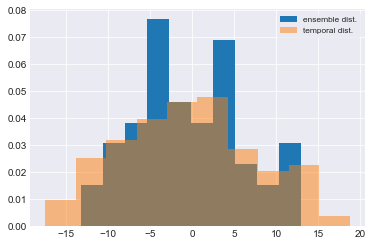

In [9]:
xx = output_63[0][:,:,0] # state component index 0 (must be 0,1,2)

plt.hist(xx[:,-1]   ,normed=1,label="ensemble dist.",alpha=1.0) # -1: last time
plt.hist(xx[-1,:]   ,normed=1,label="temporal dist.",alpha=0.5) # -1: last ensemble member
#plt.hist(xx.ravel(),normed=1,label="total    distribution",alpha=0.5)
plt.legend();

---

## The "Lorenz-95" model

The Lorenz-96 system
is a "1D" model, designed to simulate atmospheric convection.  Each state variable $\mathbf{x}_i$ can be considered some atmospheric quantity at grid point at a fixed lattitude of the earth.  The system 
is given by the coupled set of ODEs,
$$
\frac{d \mathbf{x}_i}{dt} = (\mathbf{x}_{i+1} − \mathbf{x}_{i-2}) \mathbf{x}_{i-1} − \mathbf{x}_i + F
\, ,
\quad \quad i \in \{1,\ldots,m\}
\, ,
$$
where the subscript indices apply periodically.

This model is not derived from physics but has similar characterisics, such as
<ul>
    <li> there is external forcing, determined by a parameter $F$;</li>
    <li> there is internal dissipation, emulated by the linear term;</li>
    <li> there is energy-conserving advection, emulated by quadratic terms.</li>
</ul>
[Further description](resources/DA_intro.pdf#page=23).

**Exc 4.10:** Show that the "total energy" $\sum_{i=1}^{m} \mathbf{x}_i^2$ is preserved by the quadratic terms in the ODE.  


In [11]:
show_answer("Hint: Lorenz energy")

In [12]:
show_answer("Lorenz energy")

The model is animated below.

In [13]:
# For all i, any n: s(x,n) := x[i+n], circularly.
def s(x,n):
    return np.roll(x,-n)

output_95 = [None]

def animate_lorenz_95(m=40,Force=8.0,eps=0.01,T=0):
    # Initial conditions: perturbations
    x0 = zeros(m)
    x0[0] = eps
    
    def dxdt(x,t):
        return (s(x,1)-s(x,-2))*s(x,-1) - x + Force
    
    tt = linspace(0, T, int(40*T)+1)
    xx = odeint(lambda x,t: dxdt(x,t), x0, tt)
    output_95[0] = xx
    
    plt.figure(figsize=(7,4))
    
    # Plot last only
    #plt.plot(xx[-1],'b')

    # Plot multiple
    Lag = 8
    colors = plt.cm.cubehelix(0.1+0.6*linspace(0,1,Lag))
    for k in range(Lag,0,-1):
        plt.plot(xx[max(0,len(xx)-k)],c=colors[Lag-k])

    plt.ylim(-10,20)
    plt.show()
    
interact(animate_lorenz_95,eps=(0.01,3,0.1),T=(0.05,40,0.05),Force=(0,40,1),m=(5,60,1));

Widget Javascript not detected.  It may not be installed or enabled properly.


**Exc 4.12:** Under which settings of the force `F` is the system chaotic?

---
## Error/perturbation dynamics

**Exc 4.14*:** Suppose $x(t)$ and $z(t)$ are "twins": they evolve according to the same law $f$:

$$\frac{dx}{dt} = f(x) \\ \frac{dz}{dt} = f(z) \, .$$


* a) Define the "error": $\varepsilon(t) = x(t) - z(t)$.  
Suppose $z(0)$ is close to $x(0)$.  
Let $F = \frac{df}{dx}(x(t))$.  
Show that the error evolves according to the ordinary differential equation (ODE)
$$\frac{d \varepsilon}{dt} \approx F \varepsilon \, .$$ 
* b) Show that the error grows exponentially: $\varepsilon(t) = \varepsilon(0) e^{F t} $.
* c)
 * 1) Suppose $F<1$.  
 What happens to the error?  
 What does this mean for predictability?
 * 2) Now suppose $F>1$.  
 Given that all observations are uncertain (i.e. $R_t>0$, if only ever so slightly),  
 can we ever hope to estimate $x(t)$ with 0 uncertainty?
* d) Consider the ODE derived above.  
How might we change it in order to model (i.e. emulate) a saturation of the error at some level?  
Can you solve this equation?
* e) Now suppose $z(t)$ evolves according to $\frac{dz}{dt} = g(z)$, with $g \neq f$.  
What is now the differential equation governing the evolution of the error, $\varepsilon$?

In [14]:
show_answer("error evolution")

**Exc 4.16*:** Recall the Lorenz-63 system. What is its doubling time (i.e. estimate how long does it take for two trajectories to grow twice as far apart as they were to start with) ?
*Hint: Set `N=50, eps=0.01, T=1,` and compute the spread of the particles now as compared to how they started*

In [15]:
xx = output_63[0][:,-1] # Ensemble of particles at the end of integration
### compute your answer here ###

In [16]:
show_answer("doubling time")

The answer actually depends on where in "phase space" the particles started.
To get a universal answer one must average these experiments for many different initial conditions.

---
## In summary: 
Prediction (forecasting) with these systems is challenging because they are chaotic: small errors grow exponentially.

Conversely: chaos means that there is a limit to how far into the future we can make predictions (skillfully).

It is therefore crucial to minimize the intial error as much as possible. This is a task for DA.

### Next: [Ensemble [Monte-Carlo] approach](T5 - Ensemble [Monte-Carlo] approach.ipynb)